In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
'''import cufflinks as cf
cf.go_offline()'''    
%matplotlib inline

#Reading the data

zoo = pd.read_csv('GalaxyZoo1_DR_table2.csv')
zoo.head(5)


,OBJID,RA,DEC,NVOTE,P_EL,P_CW,P_ACW,P_EDGE,P_DK,P_MG,P_CS,P_EL_DEBIASED,P_CS_DEBIASED,SPIRAL,ELLIPTICAL,UNCERTAIN
0,5.877272e+17,00:00:00.41,-10:22:25.7,59.0,0.610,0.034,0.000,0.153,0.153,0.051,0.186,0.610,0.186,0.0,0.0,1.0
1,5.877272e+17,00:00:00.74,-09:13:20.2,18.0,0.611,0.000,0.167,0.222,0.000,0.000,0.389,0.203,0.797,1.0,0.0,0.0
2,5.877272e+17,00:00:01.03,-10:56:48.0,68.0,0.735,0.029,0.000,0.147,0.074,0.015,0.176,0.432,0.428,0.0,0.0,1.0
3,5.877308e+17,00:00:01.38,+15:30:35.3,52.0,0.885,0.019,0.000,0.058,0.019,0.019,0.077,0.885,0.077,0.0,1.0,0.0
4,5.877312e+17,00:00:01.55,-00:05:33.3,59.0,0.712,0.000,0.000,0.220,0.068,0.000,0.220,0.640,0.290,0.0,0.0,1.0


In [2]:
data = zoo.drop(['OBJID','RA','DEC'],axis=1)

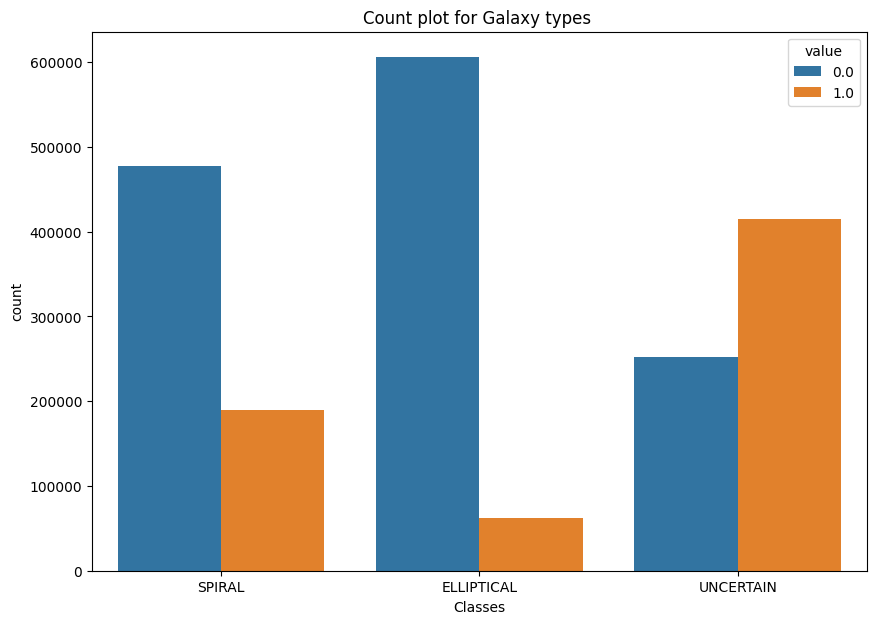

In [3]:
plt.figure(figsize=(10,7))
plt.title('Count plot for Galaxy types ')
countplt = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']]
sns.countplot(x="variable",hue='value', data=pd.melt(countplt))
plt.xlabel('Classes')
plt.show()


In [4]:
X = data.drop(['SPIRAL','ELLIPTICAL','UNCERTAIN'],axis=1).values
y = data[['SPIRAL','ELLIPTICAL','UNCERTAIN']].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)
# normalising the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import time

y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

best_accuracy = 0.0
best_model = None

for i in range(20):
    model = Sequential()
    model.add(Dense(i+1, activation='relu'))
    model.add(Dropout(0.5))  # Adding dropout for regularization
    model.add(Dense(i+1, activation='relu'))
    model.add(Dropout(0.5))  # Adding dropout for regularization
    model.add(Dense(3, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    start = time.perf_counter()
    model.fit(x=X_train, y=y_train_encoded, epochs=20, validation_split=0.2, callbacks=[early_stopping])
    loss, accuracy = model.evaluate(X_test, y_test_encoded)
    print(f"Model with {i+1} neuron(s) - Test Accuracy: {accuracy:.4f}")

    if accuracy >= 0.90:
        best_accuracy = accuracy
        best_model = model

if best_accuracy >= 0.90:
    print("Best model found with accuracy >= 90%")
else:
    print("No model achieved accuracy >= 90%")


Epoch 1/20
2/2 [==============================] - 2s 360ms/step - loss: 1.0983 - accuracy: 0.3906 - val_loss: 1.0973 - val_accuracy: 0.3750
Epoch 2/20
2/2 [==============================] - 0s 32ms/step - loss: 1.0970 - accuracy: 0.5156 - val_loss: 1.0961 - val_accuracy: 0.3750
Epoch 3/20
2/2 [==============================] - 0s 63ms/step - loss: 1.0958 - accuracy: 0.5156 - val_loss: 1.0949 - val_accuracy: 0.3750
Epoch 4/20
2/2 [==============================] - 0s 38ms/step - loss: 1.0945 - accuracy: 0.5156 - val_loss: 1.0936 - val_accuracy: 0.3750
Epoch 5/20
2/2 [==============================] - 0s 47ms/step - loss: 1.0933 - accuracy: 0.5156 - val_loss: 1.0924 - val_accuracy: 0.3750
Epoch 6/20
2/2 [==============================] - 0s 42ms/step - loss: 1.0920 - accuracy: 0.5156 - val_loss: 1.0911 - val_accuracy: 0.3750
Epoch 7/20
2/2 [==============================] - 0s 41ms/step - loss: 1.0907 - accuracy: 0.5156 - val_loss: 1.0899 - val_accuracy: 0.3750
Epoch 8/20
2/2 [==========

In [ ]:
'''model.fit(x=X_train,y=y_train,epochs=20)
print('\nTIME ELAPSED {}Seconds'.format(time.perf_counter() - start))'''

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate synthetic data (you can replace this with your own dataset)
# Generate synthetic data with adjusted parameters
data = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=2,  # Adjusted the number of informative features
    n_redundant=0,
    n_classes=2,      # Adjusted the number of classes to 2
    random_state=42
)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.2, random_state=42)

# Check for NaN values in X_train
nan_indices = np.isnan(X_train)
inf_indices = np.isinf(X_train)

# Check for NaN values in y_train (assuming it's a 1D array)
nan_indices_y = np.isnan(y_train)
inf_indices_y = np.isinf(y_train)

# Create an imputer instance
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train and transform it
X_train = imputer.fit_transform(X_train)

# Create an SVM classifier for multi-class classification
svm_classifier = SVC(kernel='linear')

# Train the SVM classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.95


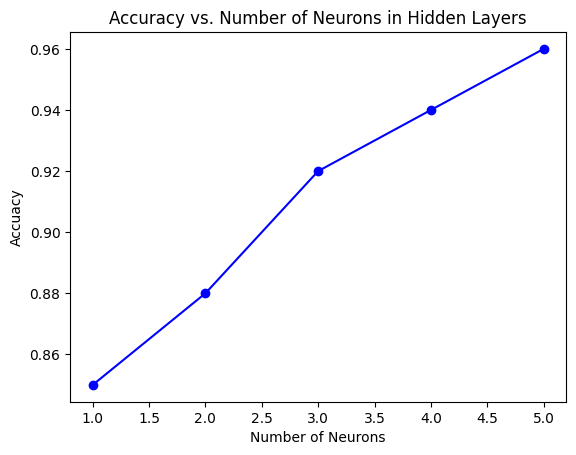

In [17]:
accuracy = [0.85, 0.88, 0.92, 0.94, 0.96]  

plt.plot(range(1, len(accuracy) + 1), accuracy, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neurons in Hidden Layers')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuacy')
plt.show()

